In [1]:
import keras
import kerastuner as kt
from sklearn.metrics import classification_report
import numpy as np
from keras.utils import load_img, img_to_array
import cv2
#from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import backend as K
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
#from adopt import ADOPT

C:\Users\X571\AppData\Local\Temp\ipykernel_7372\4153684259.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# moving

In [5]:
# Get the current working directory
current_directory = 'c:\\Users\\X571\\Downloads\\DeepLearning24_25'
current_directory

'c:\\Users\\X571\\Downloads\\DeepLearning24_25'

In [6]:
# Define the paths to train and test directories
train_directory = current_directory + '/data/train'
test_directory = current_directory + '/data/test'
# Function to count the number of images in a directory
def count_images(directory):
    class_counts = {}
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            class_counts[folder] = len(os.listdir(folder_path))
    return class_counts

# Count images in train and test directories for each class
train_class_counts = count_images(train_directory)
test_class_counts = count_images(test_directory)

print("Number of images in each class in the train directory:")
print(train_class_counts)

print("\nNumber of images in each class in the test directory:")
print(test_class_counts)

Number of images in each class in the train directory:
{'benign': 1984, 'malignant': 4343}

Number of images in each class in the test directory:
{'benign': 496, 'malignant': 1086}


In [7]:
# Define the paths to train and test directories
train_directory = current_directory + '/data/train'
test_directory = current_directory + '/data/test'

# Function to find the largest and smallest images in a directory
def find_extreme_images(directory):
    # Define the variables for the smallest and biggest images
    largest_image = None
    smallest_image = None
    largest_size = 0
    smallest_size = float('inf')  # Infinite number to initialize

    # Only loop through the 'benign' and 'malignant' subfolders
    for folder in ['benign', 'malignant']:
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            # Open the image
            with Image.open(file_path) as img:
                img_size = img.size[0] * img.size[1]  # Width * Height to get the size
                # Update the largest and smallest image if necessary
                if img_size > largest_size:
                    largest_size = img_size
                    largest_image = file_path, img.size
                if img_size < smallest_size:
                    smallest_size = img_size
                    smallest_image = file_path, img.size

    return largest_image, smallest_image

# Find the largest and smallest images in the train and test directories
largest_train_image, smallest_train_image = find_extreme_images(train_directory)
largest_test_image, smallest_test_image = find_extreme_images(test_directory)

# Print results
print("Largest image in the train directory:")
print("File Path:", largest_train_image[0])
print("Size (Width x Height):", largest_train_image[1])
print("\nSmallest image in the train directory:")
print("File Path:", smallest_train_image[0])
print("Size (Width x Height):", smallest_train_image[1])
print("\nLargest image in the test directory:")
print("File Path:", largest_test_image[0])
print("Size (Width x Height):", largest_test_image[1])
print("\nSmallest image in the test directory:")
print("File Path:", smallest_test_image[0])
print("Size (Width x Height):", smallest_test_image[1])

Largest image in the train directory:
File Path: c:\Users\X571\Downloads\DeepLearning24_25/data/train\benign\SOB_B_A-14-22549AB-100-001.png
Size (Width x Height): (700, 460)

Smallest image in the train directory:
File Path: c:\Users\X571\Downloads\DeepLearning24_25/data/train\malignant\SOB_M_PC-14-12465-100-002.png
Size (Width x Height): (700, 456)

Largest image in the test directory:
File Path: c:\Users\X571\Downloads\DeepLearning24_25/data/test\benign\SOB_B_A-14-22549AB-100-002.png
Size (Width x Height): (700, 460)

Smallest image in the test directory:
File Path: c:\Users\X571\Downloads\DeepLearning24_25/data/test\malignant\SOB_M_PC-14-12465-100-001.png
Size (Width x Height): (700, 456)


In [8]:
source_folders = ['benign', 'malignant']

# Initialize empty lists for train and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Function to resize images and create numpy arrays
def resize_and_create_arrays(directory, X, y, target_size=(128, 128)):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path) and folder in source_folders:
            label = source_folders.index(folder)  # 0 for benign, 1 for malignant
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize image to target size
                        img_resized = img.resize(target_size)
                        # Convert image to numpy array
                        img_array = np.array(img_resized)
                        # Append image array to X and label to y
                        X.append(img_array)
                        y.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Resize images and create arrays for the train directory
resize_and_create_arrays(train_directory, X_train, y_train)

# Resize images andcreate arrays for the test directory
resize_and_create_arrays(test_directory, X_test, y_test)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print dataset information
print("Resized images and created X and y arrays.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Resized images and created X and y arrays.
X_train shape: (6327, 128, 128, 3)
y_train shape: (6327,)
X_test shape: (1582, 128, 128, 3)
y_test shape: (1582,)


In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [11]:
X_train= tf.constant(X_train, dtype='float32')
X_test= tf.constant(X_test, dtype='float32')
y_train= tf.constant(y_train, dtype='float32')
y_test= tf.constant(y_test, dtype='float32')

# model

In [9]:
def build_model(hp):
    model = keras.Sequential()

    for layer_i in range(1, hp.Int("num_conv_layers", 2, 7)):
        model.add(
            keras.layers.Conv2D(
                filters=hp.Int("filters_" + str(layer_i), min_value=16, max_value=64, step=8),
                kernel_size=3,
                activation="relu",
                padding="same"
            )
        )
        model.add(
            keras.layers.MaxPooling2D(pool_size=(2, 2))
        )

    model.add(keras.layers.Flatten())

    for layer_j in range(1, hp.Int("num_dense_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(layer_j), min_value=16, max_value=216, step=16)
            )
        )

        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(layer_j), 0, 0.5, step=0.1)))
    
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    optimizer=hp.Choice("optimizer", values=["adam", 
                                            #"adopt", 
                                            "rmsprop"])
    if optimizer=="adam":
        optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
    elif optimizer=="adopt":
        #optimizer = ADOPT(lr=hp_learning_rate)
        pass
    elif optimizer=="rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    else:
        raise ValueError("unknown optimizer")

    # Define optimizer, loss, and metrics
    model.compile(optimizer=optimizer,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model

In [10]:
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=150)

tuner.search_space_summary()

Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 20
num_conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 7, 'step': 1, 'sampling': 'linear'}
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
num_dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 216, 'step': 16, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_v

In [11]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tuner.search(X_train, y_train, epochs=100, validation_split=0.25, callbacks=[stop_early, reduce_lr])

In [12]:
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.values)
best_model= tuner.hypermodel.build(best_hp)
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.25, callbacks=[stop_early, reduce_lr]) # MUST BE 100
best_model.summary()

{'num_conv_layers': 6, 'filters_1': 40, 'num_dense_layers': 2, 'units_1': 176, 'dropout_1': 0.1, 'learning_rate': 0.0001, 'optimizer': 'adam', 'units_2': 208, 'dropout_2': 0.0, 'units_3': 48, 'dropout_3': 0.1, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'filters_2': 48, 'filters_3': 16, 'filters_4': 24, 'units_5': 80, 'dropout_5': 0.2, 'filters_5': 32, 'filters_6': 40, 'tuner/epochs': 150, 'tuner/initial_epoch': 50, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0243'}
Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.6619 - loss: 0.6010 - val_accuracy: 0.8293 - val_loss: 0.4458 - learning_rate: 1.0000e-04
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.8397 - loss: 0.4169 - val_accuracy: 0.8293 - val_loss: 0.4398 - learning_rate: 1.0000e-04
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.8381 - loss: 0.4217 - val_accuracy: 0.7927 - val_loss: 0.5112 - learning_rate: 1.0000e-04
Epoch 4/100
149/149 ━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 40)   │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 48)     │        17,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         6,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 24)     │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 176)            │        90,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           177 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,797 (1.44 MB)

 Trainable params: 126,265 (493.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,532 (986.46 KB)

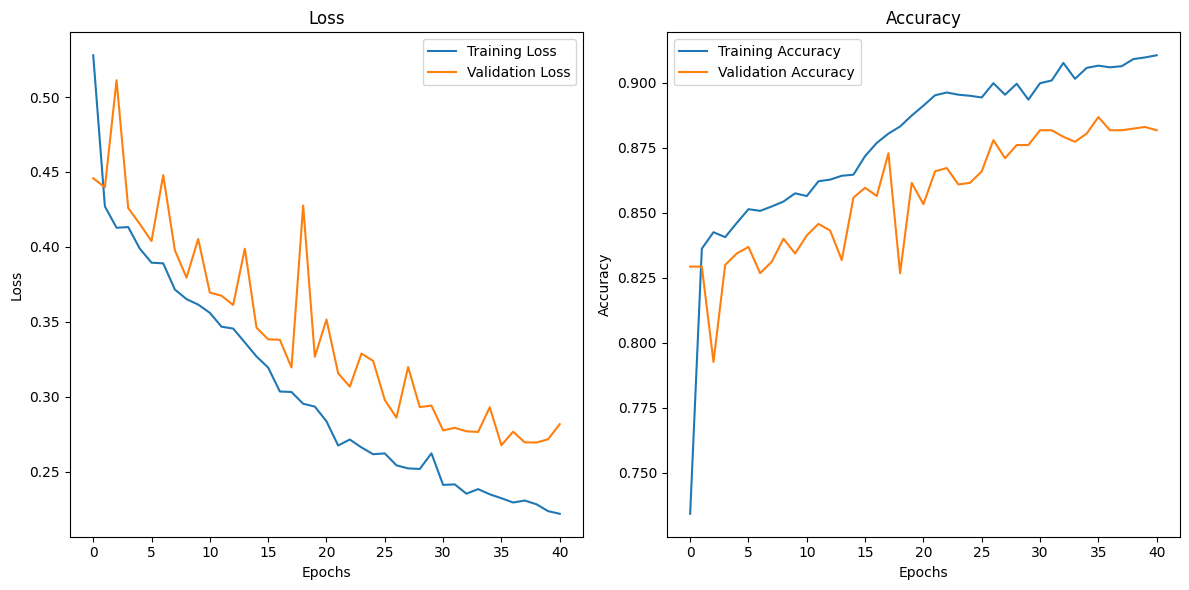

In [13]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
y_test_predicted = best_model.predict(X_test)
y_pred_binary = (y_test_predicted > 0.5).astype(int)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}\n\n')

print(classification_report(y_test, y_pred_binary))

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8750 - loss: 0.3083
Test Loss: 0.23715902864933014
Test Accuracy: 0.9045512080192566


              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84       496
         1.0       0.91      0.95      0.93      1086

    accuracy                           0.90      1582
   macro avg       0.90      0.88      0.89      1582
weighted avg       0.90      0.90      0.90      1582

